In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ab = pd.read_csv(r'C:\Users\YUVRA\Desktop\Netflix_titles.csv')

In [4]:
ab.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
pd.set_option('display.max_rows', 8807)
pd.set_option('display.max_columns', 12)

## Data Cleaning

In [7]:
ab.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
ab[['director', 'cast', 'country']] = ab[['director', 'cast', 'country']].fillna('anonymous')
ab['duration'] = ab['duration'].fillna('')
ab['rating'] = ab['rating'].fillna('not rated')

In [9]:
ab['date_added'].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [10]:
from datetime import datetime
def sol(date):
    if(type(date)==str):
        date = date.strip()
        date = datetime.strptime(date, '%B %d, %Y')
        date = date.strftime('%m-%d-%Y')
    else:
        date=''
    return date

In [11]:
ab['date_added'] = ab['date_added'].apply(sol)

In [12]:
ab['date_added'].head()

0    09-25-2021
1    09-24-2021
2    09-24-2021
3    09-24-2021
4    09-24-2021
Name: date_added, dtype: object

In [13]:
ab[['month added', 'day added','year added']] = ab['date_added'].str.split('-', expand=True)

ab[ab['date_added']=='']['year added']

6066    None
6174    None
6795    None
6806    None
6901    None
7196    None
7254    None
7406    None
7847    None
8182    None
Name: year added, dtype: object

In [14]:
import re
def sol(x):
    if(x.__contains__('min')):
        return int(re.search(r'\d+', x).group())
    else:
        return ''
    
def sol2(x):
    if(x.__contains__('Season')):
        return int(re.search(r'\d+', x).group())
    else:
        return ''
    
ab['duration (in min)'] = ab['duration'].apply(sol)
ab['duration (in season)'] = ab['duration'].apply(sol2)
ab.drop(columns=['duration'], inplace=True)

In [15]:
import re

def extract_number(s):
    return int(re.search(r'\d+', s).group())

s = '23 min'
number = extract_number(s)
print(number)

23


## EDA and data visualization

C:\Users\YUVRA\AppData\Local\Temp\ipykernel_8932\3348158763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_ab['year added'] = plot_ab['year added'].apply(lambda x: int(x))


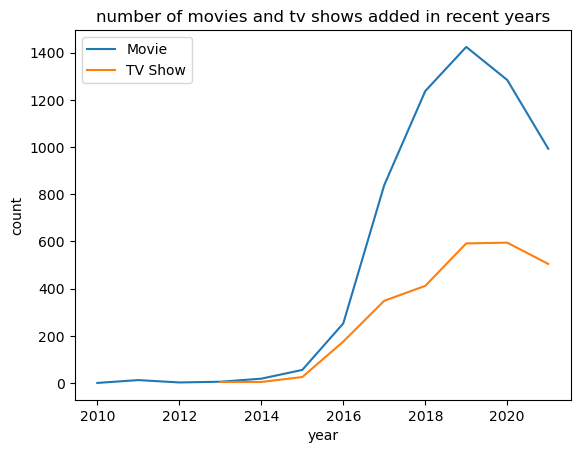

In [16]:
plot_ab = ab[~(ab['date_added']=='')]
plot_ab['year added'] = plot_ab['year added'].apply(lambda x: int(x))
plot_ab = plot_ab[plot_ab['year added']>=2010].groupby(['year added', 'type']).size().reset_index(name='count')
sns.lineplot(data=plot_ab, x='year added', y='count', hue='type')
plt.title('number of movies and tv shows added in recent years')
plt.xlabel('year')
plt.legend()
plt.show()

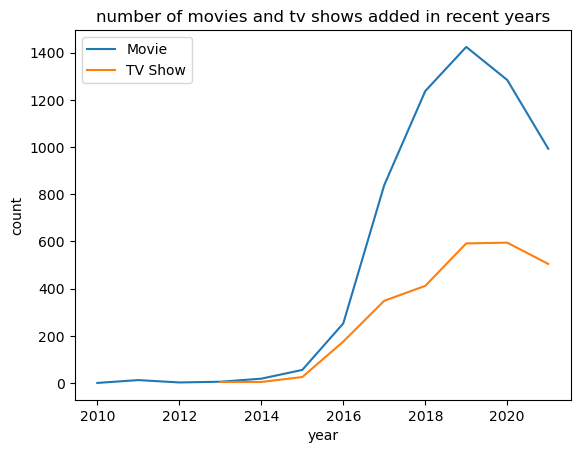

In [17]:
sns.lineplot(data=plot_ab, x='year added', y='count', hue='type')
plt.title('number of movies and tv shows added in recent years')
plt.xlabel('year')
plt.legend()
plt.show()

In [18]:
ab.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'month added',
       'day added', 'year added', 'duration (in min)', 'duration (in season)'],
      dtype='object')

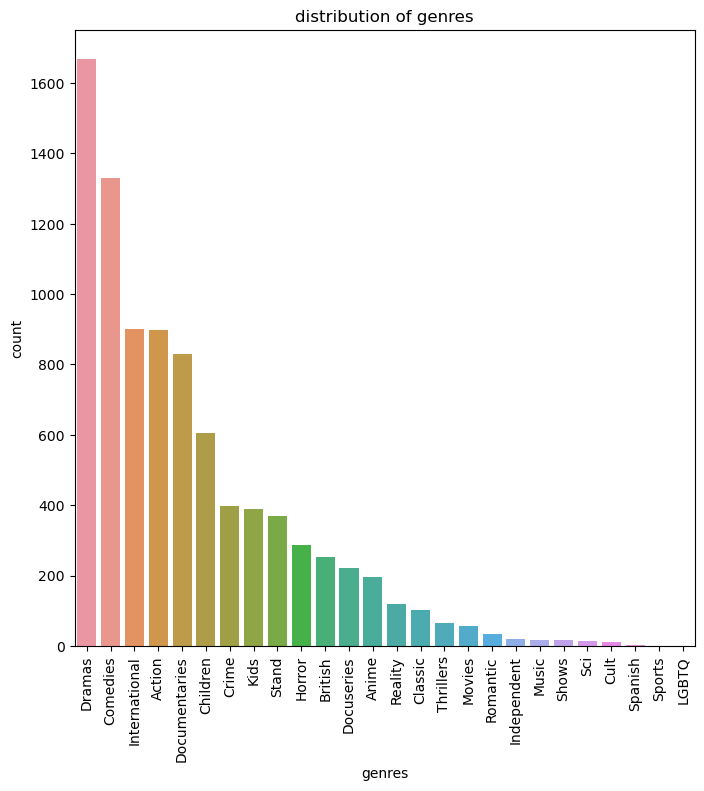

In [19]:
ab['genres'] = ab['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)
genre_counts = ab.groupby('genres').size().reset_index(name='count').sort_values(by='count', ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(data=genre_counts, y='count', x='genres')
plt.title('distribution of genres')
plt.xticks(rotation=90)
plt.show()

In [20]:
ab[(ab['country']=='Egypt') & (ab['director']!='anonymous')].groupby('director')['title'].apply(list)

director
Ahmad El-Badri                           [My Sleeping Lover, Omar & Salma 2, The Player]
Ahmad Samir Farag                                                         [Love Station]
Ahmed Al-Badry                                                               [Game Over]
Ahmed El Gendy                                             [Monopoly (The Bank Of Luck)]
Ahmed Medhat                                                  [The International Player]
Ahmed Nader Galal                      [Son Of Adam, Can’t Complain, We'll Be Right B...
Ahmed Saleh                                                                 [The Dealer]
Ahmed Yousry, Hazem Fouda                                                    [Boushkash]
Akram Farouk                                                          [Hamza's Suitcase]
Ali Ragab                                                     [Karkar, The Beach Loafer]
Amr Arafa                              [She Made Me a Criminal, Sameer Abu Alneel, Th...
Amr Salama  

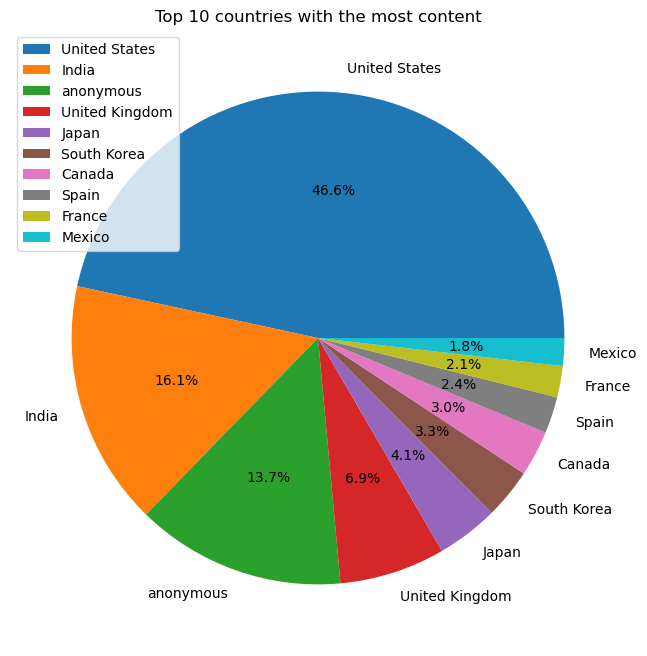

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(ab['country'].value_counts().head(10), labels=ab['country'].value_counts().head(10).index, autopct='%1.1f%%')
plt.title('Top 10 countries with the most content')
plt.legend(loc='upper left')
plt.show()

In [22]:
tmp = ab[(ab['type']=='TV Show') & (ab['country']=='United States') & (ab['duration (in season)']!='')]
tmp['duration (in season)'] = tmp['duration (in season)'].astype(int)
tmp[tmp['duration (in season)']<=2][['title', 'duration (in season)']].sort_values(by='duration (in season)', ascending=False).head()

C:\Users\YUVRA\AppData\Local\Temp\ipykernel_8932\3543846112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['duration (in season)'] = tmp['duration (in season)'].astype(int)


,title,duration (in season)
1543,Black Ink Crew New York,2
3146,Scooby-Doo!: Mystery Incorporated,2
1615,Ink Master,2
6868,Goldie & Bear,2
3183,The Last O.G.,2
